# Importing libraries

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.impute import SimpleImputer

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D
from tensorflow.keras.optimizers import Adam
print(tf.__version__)

2.0.0-rc0


# Importing Data

In [4]:
dataset=pd.read_csv('Heart_Disease_Prediction.csv')
X=dataset.iloc[:, :-1].values
Y=dataset.iloc[:, -1].values

In [5]:
print(X)

[[70.  1.  4. ...  2.  3.  3.]
 [67.  0.  3. ...  2.  0.  7.]
 [57.  1.  2. ...  1.  0.  7.]
 ...
 [56.  0.  2. ...  2.  0.  3.]
 [57.  1.  4. ...  2.  0.  6.]
 [67.  1.  4. ...  2.  3.  3.]]


In [6]:
print(Y)

[1 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 1 1
 1 0 0 1 0 0 0 1 0 1 1 1 1 1 0 0 0 0 0 1 0 1 1 0 1 0 0 0 1 0 1 0 1 1 0 0 0
 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 1 1 1 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 1
 0 1 0 0 0 1 1 0 1 1 1 1 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 1
 1 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 1 0 1 1 0 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 1 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 1
 0 1 0 0 1 1 0 0 1 1 0 1 0 1 0 1 0 0 1 0 0 1 0 1 1 0 1 1 1 0 1 0 0 0 0 1 1
 0 0 1 1 0 1 0 0 0 0 1]


# Taking care of missing data

In [7]:
imputer=SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, 1:-1])
X[:, 1:-1]=imputer.transform(X[:, 1:-1])

In [8]:
print(X)

[[70.  1.  4. ...  2.  3.  3.]
 [67.  0.  3. ...  2.  0.  7.]
 [57.  1.  2. ...  1.  0.  7.]
 ...
 [56.  0.  2. ...  2.  0.  3.]
 [57.  1.  4. ...  2.  0.  6.]
 [67.  1.  4. ...  2.  3.  3.]]


# Model (CNN)


In [9]:
dataset.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [10]:
X.shape

(270, 13)

In [11]:
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.2, random_state=0, stratify=Y)

In [12]:
X_train.shape

(216, 13)

In [13]:
X_test.shape

(54, 13)

In [14]:
X_train= X_train.reshape(216,13,1)
X_test= X_test.reshape(54,13,1)

In [15]:
X_train

array([[[57.],
        [ 1.],
        [ 3.],
        ...,
        [ 1.],
        [ 0.],
        [ 3.]],

       [[59.],
        [ 1.],
        [ 4.],
        ...,
        [ 2.],
        [ 0.],
        [ 7.]],

       [[66.],
        [ 1.],
        [ 4.],
        ...,
        [ 1.],
        [ 1.],
        [ 3.]],

       ...,

       [[47.],
        [ 1.],
        [ 4.],
        ...,
        [ 1.],
        [ 0.],
        [ 3.]],

       [[57.],
        [ 1.],
        [ 3.],
        ...,
        [ 1.],
        [ 1.],
        [ 7.]],

       [[63.],
        [ 0.],
        [ 3.],
        ...,
        [ 1.],
        [ 0.],
        [ 3.]]])

In [16]:
epochs= 50
model= Sequential()
model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(13,1)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(13,1)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 12, 32)            96        
_________________________________________________________________
batch_normalization (BatchNo (None, 12, 32)            128       
_________________________________________________________________
dropout (Dropout)            (None, 12, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 11, 64)            4160      
_________________________________________________________________
batch_normalization_1 (Batch (None, 11, 64)            256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 11, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 704)               0

In [31]:
model.compile(optimizer=Adam(lr=0.0005), loss='binary_crossentropy',metrics=['accuracy'])

In [32]:
history=model.fit(X_train,Y_train,epochs=epochs, validation_data=(X_test, Y_test),verbose=1)

Train on 216 samples, validate on 54 samples
Epoch 1/50
216/216 [==============================] - 2s 8ms/sample - loss: 0.6778 - accuracy: 0.5694 - val_loss: 0.6688 - val_accuracy: 0.7222
Epoch 2/50
216/216 [==============================] - 0s 378us/sample - loss: 0.6483 - accuracy: 0.6065 - val_loss: 0.6540 - val_accuracy: 0.6852
Epoch 3/50
216/216 [==============================] - 0s 266us/sample - loss: 0.6824 - accuracy: 0.5972 - val_loss: 0.6558 - val_accuracy: 0.7407
Epoch 4/50
216/216 [==============================] - 0s 262us/sample - loss: 0.6926 - accuracy: 0.5926 - val_loss: 0.6491 - val_accuracy: 0.7407
Epoch 5/50
216/216 [==============================] - 0s 306us/sample - loss: 0.6453 - accuracy: 0.6528 - val_loss: 0.6388 - val_accuracy: 0.8148
Epoch 6/50
216/216 [==============================] - 0s 300us/sample - loss: 0.6592 - accuracy: 0.5694 - val_loss: 0.6327 - val_accuracy: 0.7778
Epoch 7/50
216/216 [==============================] - 0s 298us/sample - loss: 0.6

# Graphs

In [20]:
def plot_learningCurve(history, epoch):
    #Accuracy
    epoch_range= range(1, epoch+1)
    plt.plot(epoch_range, history.history['accuracy'])
    plt.plot(epoch_range, history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train','val'], loc='upper left')
    plt.show()
    
    #Loss
    plt.plot(epoch_range, history.history['loss'])
    plt.plot(epoch_range, history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train','val'], loc='upper left')
    plt.show()
    

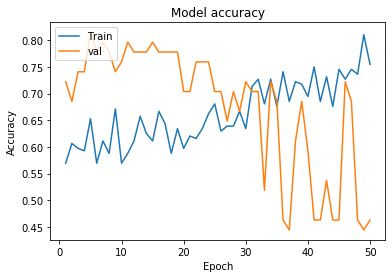

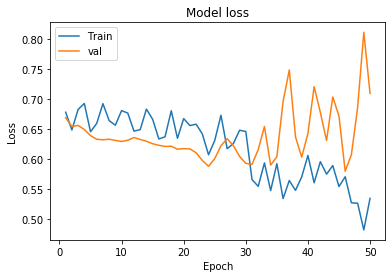

In [33]:
plot_learningCurve(history, epochs)